In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tqdm
import random
from tensorflow.keras import models, layers
from keras.utils import img_to_array, array_to_img, to_categorical
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam

In [ ]:
tomato_early_blight = '/content/drive/MyDrive/Tomato/Tomato_Early_blight'
tomato_late_blight = '/content/drive/MyDrive/Tomato/Tomato_Late_blight'
leaf_mold = '/content/drive/MyDrive/Tomato/Tomato_Leaf_Mold'
tomato_healthy = '/content/drive/MyDrive/Tomato/Tomato_healthy'


In [ ]:
IMAGE_SIZE=128

In [ ]:
print(len(os.listdir(tomato_early_blight)))
print(len(os.listdir(tomato_late_blight)))
print(len(os.listdir(leaf_mold)))
print(len(os.listdir(tomato_healthy)))


1000
1909
952
1591


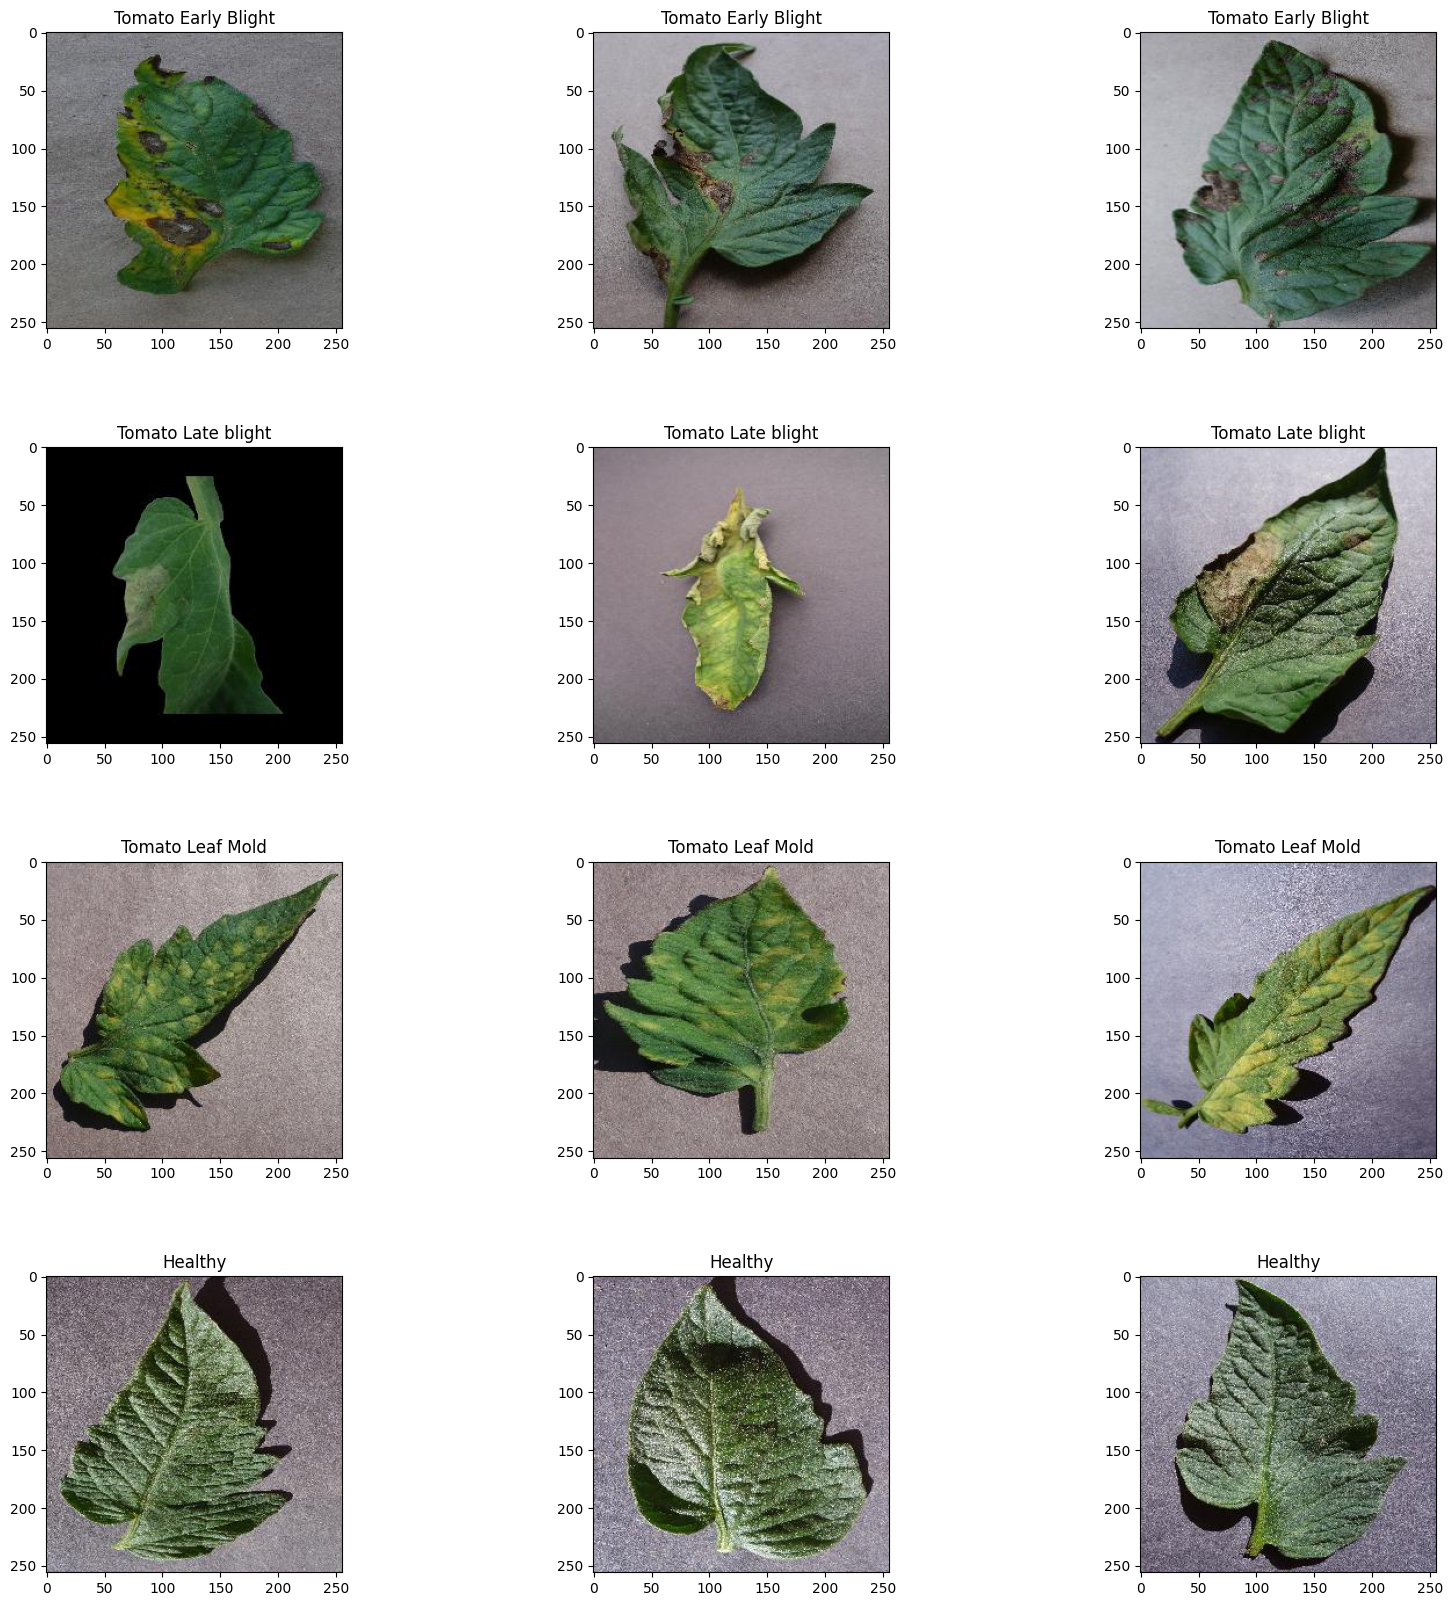

In [ ]:
fig,axes=plt.subplots(4,3,figsize=(20,20))
plt.subplots_adjust(hspace=0.4)
axex=axes.ravel()
m=0
for i in range(3):
  image=plt.imread(tomato_early_blight + '/' + random.choice(os.listdir(tomato_early_blight)) )
  axex[m].imshow(image)
  axex[m].set_title('Tomato Early Blight')
  m+=1
for i in range(3):
  image=plt.imread(tomato_late_blight + '/' + random.choice(os.listdir(tomato_late_blight)) )
  axex[m].imshow(image)
  axex[m].set_title('Tomato Late blight')
  m+=1

for i in range(3):
  image=plt.imread(leaf_mold + '/' + random.choice(os.listdir(leaf_mold)))
  axex[m].imshow(image)
  axex[m].set_title('Tomato Leaf Mold')
  m+=1

for i in range(3):
  image=plt.imread(tomato_healthy + '/' + random.choice(os.listdir(tomato_healthy)) )
  axex[m].imshow(image)
  axex[m].set_title('Healthy')
  m+=1 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
def convert_image_array(image_path):
  try:
    image=cv2.imread(image_path)
    if image is not None:
      image=cv2.resize(image,(IMAGE_SIZE,IMAGE_SIZE))
      hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
      mask1 = cv2.inRange(hsv, (25, 52, 72), (102, 255, 255))
      result = cv2.bitwise_not(image,image, mask= mask1)
      return(img_to_array(result))
    else:
      return np.array([])
  except Exception as e:
    print("Error",e)


In [ ]:
path='/content/drive/MyDrive/Tomato'
root_dir=os.listdir(path)
print(root_dir)

['Tomato_Leaf_Mold', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Early_blight']


In [ ]:
image_list,image_label=[],[]
temp=-1
for dir in root_dir:
  new_list=os.listdir(path + '/' + dir)
  temp+=1
  print(len(new_list))
  for i in new_list:
    img_path=path + '/' + dir + '/' + i
    image_list.append(convert_image_array(img_path))
    image_label.append(temp)
print(image_label)

952
1909
1591
1000
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_list[100].shape

(128, 128, 3)

In [ ]:
norm_image_list=np.array(image_list,dtype=np.float16)/255.0

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(norm_image_list, image_label, random_state = 0)



In [ ]:
xtrain[0].shape

(128, 128, 3)

In [ ]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [ ]:
from keras.models import Sequential
import tensorflow as tf

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  # layers.experimental.preprocessing.RandomContrast([.5,2]),
  # layers.experimental.preprocessing.RandomRotation(factor=0.2),
  # layers.experimental.preprocessing.RandomZoom(height_factor=0.1, width_factor=0.1)
])

In [ ]:
# input_shape = (32,IMAGE_SIZE, IMAGE_SIZE,3)
# n_classes = 4

# model = models.Sequential([
#     data_augmentation,
#     layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(n_classes, activation='softmax'),
# ])

# model.build(input_shape=input_shape)

In [ ]:
# from tensorflow.keras import Sequential, Model
# from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
# from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
# from tensorflow.keras.layers import Conv1D, Embedding, GlobalAveragePooling1D 
# from tensorflow.keras.optimizers import Adam, RMSprop
# from tensorflow.keras.applications.resnet_v2 import preprocess_input

# def image_model():
#     model=tf.keras.applications.VGG16(input_shape=image_list[0].shape,
#                                       include_top=False,
#                                       weights='imagenet')

#     model.trainable=False


#     inputs=tf.keras.Input(shape=image_list[0].shape,name = 'image_input')
#     x=data_augmentation(inputs)
#     x=preprocess_input(x)
#     x1=model(x)
#     x1=Dropout(0.2)(x1)
#     x1=Conv2D(64,kernel_size=2,padding='valid')(x1)
#     x1=Dropout(0.3)(x1)
#     x1=Dense(512)(x1)
#     prediction_layer= tf.keras.layers.Dense(4,activation='softmax')
#     output= prediction_layer(x1)
#     return inputs,output

# image_input,image_layers=image_model()

In [ ]:
from tensorflow.keras import Model
vgg = tf.keras.applications.VGG16(input_shape = xtrain[0].shape, weights = 'imagenet', include_top =  False)
for layer in vgg.layers:
    layer.trainable = False

data_augmentation
x = Flatten()(vgg.output)
prediction = Dense(4, activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
# model = tf.keras.Model(inputs = image_input , outputs = image_layers)

In [ ]:
# base_learning_rate = 0.0001

model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(
    x=xtrain,
    y=ytrain,
    batch_size=32,
    epochs=15,
    validation_data=(xtest,ytest)
) 
                      
                       

Epoch 1/15
128/128 [==============================] - 28s 102ms/step - loss: 0.5357 - accuracy: 0.7924 - val_loss: 0.4420 - val_accuracy: 0.8239
Epoch 2/15
128/128 [==============================] - 7s 55ms/step - loss: 0.2874 - accuracy: 0.8966 - val_loss: 0.2830 - val_accuracy: 0.9061
Epoch 3/15
128/128 [==============================] - 8s 61ms/step - loss: 0.2123 - accuracy: 0.9305 - val_loss: 0.2836 - val_accuracy: 0.8980
Epoch 4/15
128/128 [==============================] - 7s 55ms/step - loss: 0.1700 - accuracy: 0.9442 - val_loss: 0.2496 - val_accuracy: 0.9120
Epoch 5/15
128/128 [==============================] - 7s 54ms/step - loss: 0.1362 - accuracy: 0.9606 - val_loss: 0.2487 - val_accuracy: 0.9046
Epoch 6/15
128/128 [==============================] - 7s 55ms/step - loss: 0.1134 - accuracy: 0.9687 - val_loss: 0.2695 - val_accuracy: 0.9039
Epoch 7/15
128/128 [==============================] - 8s 61ms/step - loss: 0.0984 - accuracy: 0.9782 - val_loss: 0.2262 - val_accuracy: 0.90

In [ ]:
# model.summary()

In [ ]:
# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [ ]:
# history = model.fit(
#     xtrain,
#     ytrain,
#     batch_size=32,
#     validation_split=0.2,
#     verbose=1,
#     epochs=30,
# )

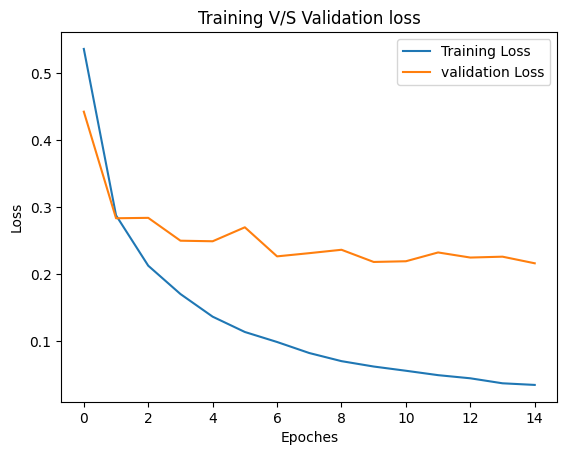

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title("Training V/S Validation loss")
plt.legend()


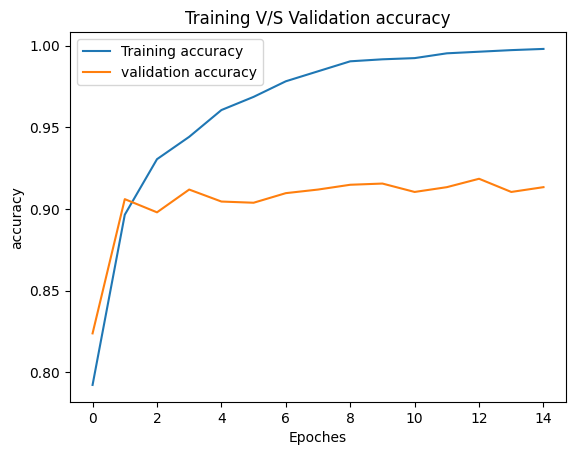

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoches')
plt.ylabel('accuracy')
plt.title("Training V/S Validation accuracy")
plt.legend()

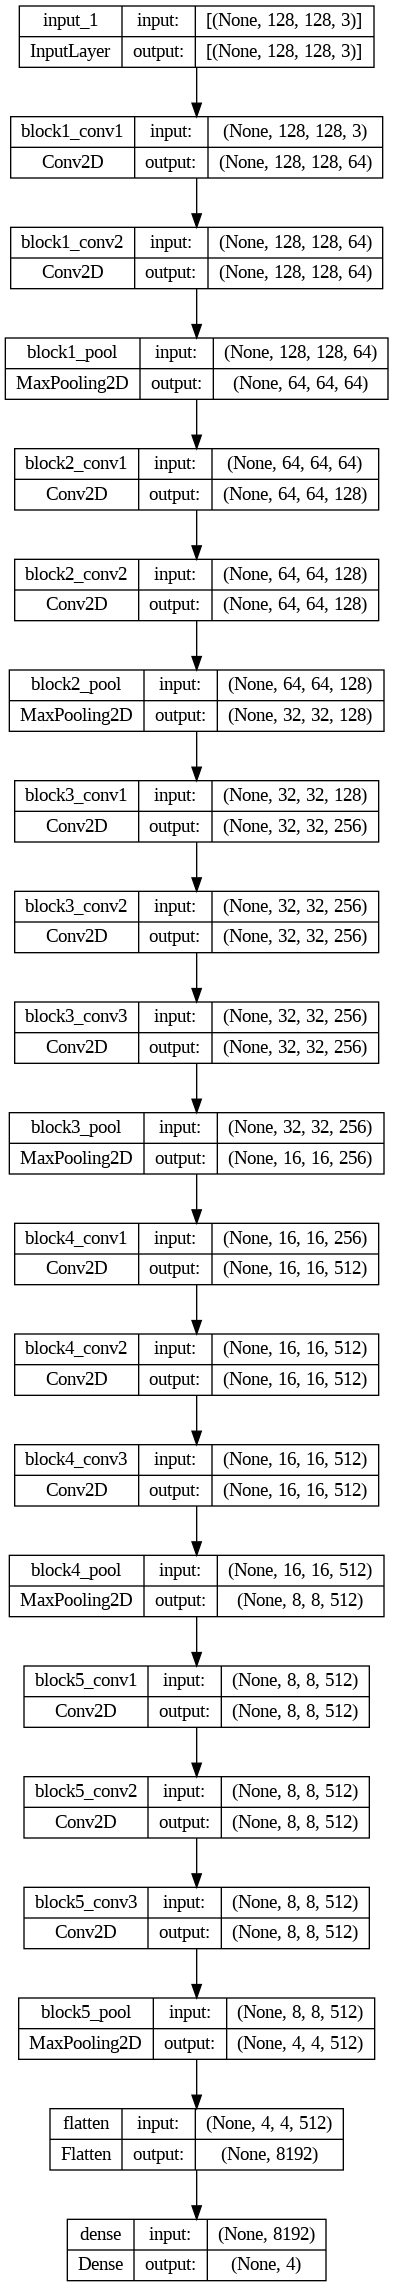

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.evaluate(xtest,ytest)

43/43 [==============================] - 2s 42ms/step - loss: 0.2159 - accuracy: 0.9134


[0.21585148572921753, 0.9134262800216675]

In [ ]:
y_pred=model.predict(xtest)


43/43 [==============================] - 2s 41ms/step


In [ ]:
ypred=np.argmax(y_pred,axis=1)
yactual=np.argmax(ytest,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(yactual, ypred)
matrix

array([[225,   5,   0,  13],
       [  4, 417,   1,  41],
       [  2,   0, 399,   3],
       [ 18,  28,   3, 204]])


# Test for image

In [ ]:
xtest[0]


array([[[0.4902, 0.537 , 0.5605],
        [0.4863, 0.533 , 0.5566],
        [0.5137, 0.5566, 0.5884],
        ...,
        [0.753 , 0.753 , 0.8   ],
        [0.745 , 0.745 , 0.792 ],
        [0.745 , 0.745 , 0.792 ]],

       [[0.5176, 0.5527, 0.5884],
        [0.5137, 0.549 , 0.5884],
        [0.537 , 0.569 , 0.612 ],
        ...,
        [0.741 , 0.741 , 0.788 ],
        [0.7646, 0.7646, 0.8115],
        [0.741 , 0.741 , 0.788 ]],

       [[0.5176, 0.541 , 0.5923],
        [0.5137, 0.533 , 0.5884],
        [0.533 , 0.5527, 0.608 ],
        ...,
        [0.757 , 0.757 , 0.8037],
        [0.757 , 0.757 , 0.8037],
        [0.7686, 0.7686, 0.816 ]],

       ...,

       [[0.2627, 0.2432, 0.251 ],
        [0.2666, 0.2471, 0.255 ],
        [0.2825, 0.2627, 0.2705],
        ...,
        [0.7256, 0.718 , 0.741 ],
        [0.7256, 0.718 , 0.741 ],
        [0.7295, 0.7217, 0.745 ]],

       [[0.2627, 0.2432, 0.251 ],
        [0.2705, 0.251 , 0.2588],
        [0.2588, 0.2393, 0.2471],
        .

In [ ]:
path='/content/1885.jpg'


a=convert_image_array(path)
a=a.reshape(-1,128,128,3)
norm_image_list=np.array(a,dtype=np.float16)/255.0
b=model.predict(norm_image_list) 
c=np.argmax(b,axis=1)
# plt.imshow(img)
classes=['Tomato_Leaf_Mold', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Early_blight']
if c==0:
  print(classes[0])
elif c==1:
  print(classes[1])
elif c==2:
  print(classes[2])
elif c==3:
  print(classes[3])
else:
  print("Error!!")
print(c)



1/1 [==============================] - 0s 20ms/step
Tomato_Late_blight
[1]


Text(0.5, 1.0, 'Without Diseased Part')

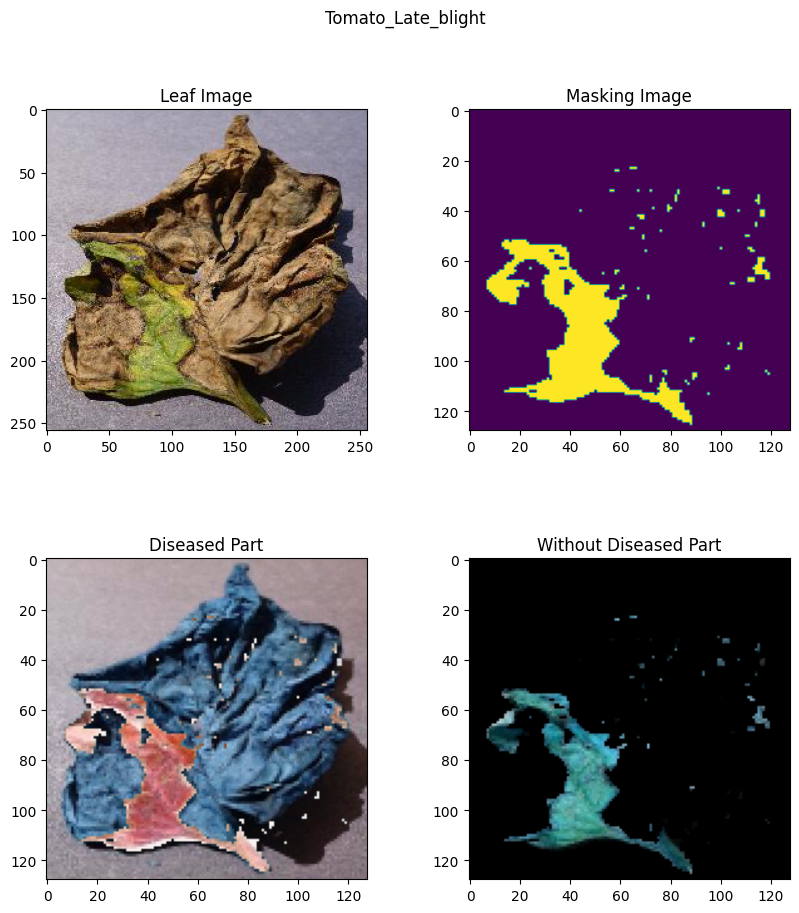

In [ ]:
img=cv2.imread(path)
img=cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(hsv, (20, 0, 0), (110, 255, 255))
result = cv2.bitwise_and(img,img, mask= mask1)
result1 = cv2.bitwise_not(img,img, mask= mask1)


figure, axis = plt.subplots(2, 2,figsize=(10,10))
plt.subplots_adjust(hspace=0.4)
figure.suptitle(classes[c[0]])
i=plt.imread(path)

axis[0, 0].imshow(i)
axis[0, 0].set_title("Leaf Image")
axis[0, 1].imshow(mask1)
axis[0, 1].set_title("Masking Image")
axis[1, 0].imshow(result1)
axis[1, 0].set_title("Diseased Part")
axis[1, 1].imshow(result)
axis[1, 1].set_title("Without Diseased Part")

<Axes: >

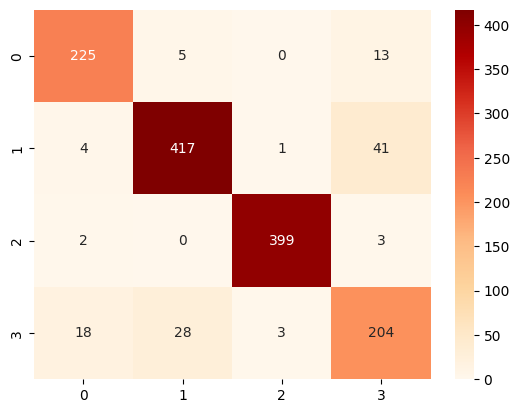

In [ ]:
import seaborn as sns
# sns.heatmap(matrix, annot=True,cmap='OrRd', fmt='g',)
# labels = ['Tomato_Leaf_Mold', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Early_blight']
# labels = np.asarray(labels).reshape(4,4)
sns.heatmap(matrix, annot=True, fmt='g', cmap='OrRd')

In [ ]:
model.save('./Tomato_disease.h5')
